<a href="https://colab.research.google.com/github/harrisb002/CS_479/blob/Labs/sequentialModel_init.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax
from tensorflow.keras.utils import plot_model


## Sequential models
Create an instance of Sequential class which will be a feedforward network with a single hidden layer.

The hidden layer is fully connected and contains 64 units and output layer contains 10 units. That is implemented using the `Dense` layer. The first layer is given the size of the input data using the keyword `input_shape`.

In [ ]:
#by default, activation is linear
model = Sequential([
    Dense(64, activation = 'relu', input_shape = (784,)),
    Dense(10, activation = 'softmax', name = 'awesome_output_layer')
]
)

In [ ]:
#If the input is coming as an image, we can use a flatten layer
model1 = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
]
)

Print the architecture of the network using the `summary()` method

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 awesome_output_layer (Dens  (None, 10)                650       
 e)                                                              
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                50240     
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


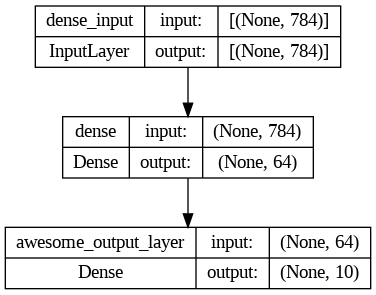

In [ ]:
plot_model(model, show_shapes=True)

The weights of the network are stored in the `weights` attribute

In [ ]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(784, 64) dtype=float32, numpy=
 array([[ 0.01558465,  0.02182862, -0.0727654 , ..., -0.00770108,
          0.07561966, -0.02944306],
        [ 0.04884223,  0.05386115,  0.04191358, ..., -0.0183517 ,
          0.08161204, -0.07170246],
        [ 0.00457682, -0.07838877, -0.02668739, ...,  0.01706789,
          0.03023803,  0.01666195],
        ...,
        [-0.03954256,  0.01738139,  0.07964312, ...,  0.07901848,
          0.0309589 , -0.04588785],
        [ 0.00236572, -0.04384949, -0.05108202, ..., -0.05708726,
         -0.01277266, -0.07144141],
        [ 0.0403909 , -0.00155701, -0.07640228, ...,  0.06131699,
          0.04410756,  0.05280202]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(64,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [ ]:
model.output_shape

(None, 10)

Print the output shape of each layer separately (also shown in output of the `summary` method)

In [ ]:
for layer in model.layers:
    print(layer.output_shape) #first dimension is the batch size

(None, 64)
(None, 10)


### Convolutional layers

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Conv1D, MaxPooling1D

Add convolutional layers using `Conv2D`. It takes in the number of filters as the first argument. The second argument is the shape of the kernel. The default stride is 1, and there is no zero padding.

Add a subsampling layer using `MaxPooling2D` that takes the kernel size as the first argument.

In [ ]:
model2 = Sequential([
    #Conv2D takes number of filters as the first argument.
    #Second argument is the shape of the kernel
    #Default stride is 1, and no zero padding
        #add padding = 'SAME' for same sized output
    Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)), #, data_format='channels_last'
    #Conv2D(16, (3, 3), padding = 'valid', strides=2, activation='relu', input_shape=(32, 32, 3)),

    #pooling window size
    MaxPooling2D(3, 3),

    #Unroll into a single 1D vector
    Flatten(),

    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
for layer in model2.layers:
    #output the shape of the tensors at each layer
    print(layer.output_shape) #first dimension is the batch size

(None, 30, 30, 16)
(None, 10, 10, 16)
(None, 1600)
(None, 64)
(None, 10)


In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 10, 16)        0         
 D)                                                              
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_3 (Dense)             (None, 64)                102464    
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 103562 (404.54 KB)
Trainable params: 103562 (404.54 KB)
Non-trainable params: 0 (0.00 Byte)
______________

**QUESTION**: why are the number of parameters in the first `Conv2D` layer = 448?

### Default weights and biases

**Note**: You may skip this in your first reading. Come back to it when you want to learn about different ways of intialzing weights.

In the models we have worked with so far, we have not specified the initial values of the weights and biases in each layer of our neural networks.

The default values of the weights and biases in TensorFlow depend on the type of layers we are using.

For example, in a `Dense` layer, the biases are set to zero (`zeros`) by default, while the weights are set according to `glorot_uniform`, the Glorot uniform initialiser.

The Glorot uniform initialiser draws the weights uniformly at random from the closed interval $[-c,c]$, where $$c = \sqrt{\frac{6}{n_{input}+n_{output}}}$$

and $n_{input}$ and $n_{output}$ are the number of inputs to, and outputs from the layer respectively.

### Initialising your own weights and biases
We often would like to initialise our own weights and biases, and TensorFlow makes this process quite straightforward.

When we construct a model in TensorFlow, each layer has optional arguments `kernel_initialiser` and `bias_initialiser`, which are used to set the weights and biases respectively.

If a layer has no weights or biases (e.g. it is a max pooling layer), then trying to set either `kernel_initialiser` or `bias_initialiser` will throw an error.

Let's see an example, which uses some of the different initialisations available in Keras.

In [ ]:
#Constructing a model

model3 = Sequential([
    Conv1D(filters=16, kernel_size=3, input_shape=(128, 64), kernel_initializer='random_uniform', bias_initializer="zeros", activation='relu'),
    MaxPooling1D(pool_size=4),
    Flatten(),
    Dense(64, kernel_initializer='he_uniform', bias_initializer='ones', activation='relu'),
])

In [ ]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 126, 16)           3088      
                                                                 
 max_pooling1d (MaxPooling1  (None, 31, 16)            0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 496)               0         
                                                                 
 dense (Dense)               (None, 64)                31808     
                                                                 
Total params: 34896 (136.31 KB)
Trainable params: 34896 (136.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Loss function (measure of model's performance), optimization algorithm (eg. gradient descent), and metrics for measuring classification accuracy.

For specifying the loss function, how to optimize (minimize) it, and specify metrics to measure classification accuracy, Tensorflow provides the `compile` method.

First, let's create a simple neural network with one fully connected hidden layer and a single neuron in the output layer.

In [ ]:
model = Sequential([
    Dense(64, activation = 'relu', input_shape = (32,)),
    Dense(1, activation = 'sigmoid', name = 'binary_output_layer')
]
)

Options for optimizers are *Stochastic Gradient Descent* (`sgd`), *Adam* (`adam`), etc.

Options for loss functions are *Cross Entropy* (`binary_crossentropy`, `categorical_crossentropy`, `sparse_categorical_crossentropy`), etc.

Options for metrics are *Classification accuracy* (`accuracy`), *Mean absolute error* (`mae`), etc.


In [ ]:
model.compile(
    optimizer = 'sgd', #other options: 'adam', 'rmsprop'
    loss = 'binary_crossentropy', #when the output is binary (a single neuron)
    #loss = 'categorical_crossentropy', #when the output is not binary (multiple neurons) (and labels are one-hot-encoded)

    metrics = ['accuracy'] #evaluates each epoch of the training along with the evaluation of the loss function
    #metrics = ['accuracy', 'mae'] #more metrics can be added such as mean-absolute-error
)

Keras makes defining the optimizers, loss functions and metrics quite straightforward using strings. But, note that each of these strings is a reference to another function or object.
```
opt = tf.keras.optimizers.SGD() #tf.keras.optimizers.Adam(learning_rate=0.005)
lossfn = tf.keras.losses.BinaryCrossentropy()
lossfn = tf.keras.losses.CategoricalCrossentropy()
```
From [documentation](https://keras.io/api/losses/probabilistic_losses/#categorical_crossentropy-function) use this crossentropy loss function when there are two or more label classes. We expect labels to be provided in a `one_hot` representation (explained below). If you want to provide labels as integers, use `SparseCategoricalCrossentropy` loss.

What is the advantage of using the objects directly?

### More on Metrics

**Note**: You may skip this in your first reading. Come back to it when you want to learn about how exactly a network's performance is assessed.

### Case 1 - Binary Classification with sigmoid activation function
Suppose we are training a model for a binary classification problem with a sigmoid activation function (softmax activation functions are covered in the next case).

Given a training example with input $x^{(i)}$, the model will output a float between 0 and 1. Based on whether this float is less than or greater than our "threshold" (which by default is set at 0.5), we round the float to get the predicted classification $y_{pred}$ from the model.

The accuracy metric compares the value of $y_{pred}$ on each training example with the true output, the one-hot coded vector $y_{true}^{(i)}$ from our training data.

Let $$\delta(y_{pred}^{(i)},y_{true}^{(i)}) = \begin{cases} 1 & y_{pred}=y_{true}\\
0 & y_{pred}\neq y_{true} \end{cases}$$

The accuracy metric  computes the mean of $\delta(y_{pred}^{(i)},y_{true}^{(i)})$ over all training examples.

$$ accuracy = \frac{1}{N} \sum_{i=1}^N \delta(y_{pred}^{(i)},y_{true}^{(i)}) $$

This is implemented in the backend of Keras as follows.
Note: We have set $y_{true}$ and $y_{pred}$ ourselves for the purposes of this example.

### Case 2 - Categorical Classification
Now suppose we are training a model for a classification problem which should sort data into $m>2$ different classes using a softmax activation function in the last layer.

Given a training example with input $x^{(i)}$, the model will output a tensor of probabilities $p_1, p_2, \dots p_m$, giving the likelihood (according to the model) that $x^{(i)}$ falls into each class.

The accuracy metric works by determining the largest argument in the $y_{pred}^{(i)}$ tensor, and compares its index to the index of the maximum value of $y_{true}^{(i)}$ to determine $\delta(y_{pred}^{(i)},y_{true}^{(i)})$. It then computes the accuracy in the same way as for the binary classification case.

$$ accuracy = \frac{1}{N} \sum_{i=1}^N \delta(y_{pred}^{(i)},y_{true}^{(i)}) $$

In the backend of Keras, the accuracy metric is implemented slightly differently depending on whether we have a binary classification problem ($m=2$) or a categorical classifcation problem. Note that the accuracy for binary classification problems is the same, no matter if we use a sigmoid or softmax activation function to obtain the output.



```
acc = tf.keras.metrics.BinaryAccuracy() #can provide threshold as a parameter
mae = tf.keras.metrics.MeanAbsoluteError()
model.compile(optimizer=opt, #optimizer='sgd',
              loss = lossfn, #loss='sparse_categorical_crossentropy',
              metrics= [acc, mae] #['accuracy', 'mae']
              )
```

## The Fit Method

By now a deep-learning model is fully defined. We have the architecture, the number of layers, activation functions, and so on. We've also assigned an optimizer to the model, possibly with some options of its own, and loss function, and maybe some metrics to track. So now it's time to train the model! Tensorflow provides the `fit` method.

Training the data is as simple as calling the fit function and providing the training data and training labels. Eg:
`model.fit(X_train, y_train)`

Assume for now that both X_train and y_train are Numpy arrays, where all of the dataset inputs have been stacked together into a single array, `X_train`, and all the targets or outputs are in `y_train`.

Shape of `X_train` = (`num_samples`, `num_features`)

Shape of `y_train` = (`num_samples`, `num_classes`) #one-hot encoded version

Shape of `y_train` = (`num_samples`,) #sparse label version

One hot encoding means each row of `y_train` is a vector of length `num_classes` which is all zeros, except for a one in the place corresponding to the correct class.

The other alternative, of course, is that labels have a "sparse" representation, i.e. just a single integer for each label, then `y_train` could be a one-dimensional array with length equal to the number of samples. Which loss function should we use in this case?

Passing these arrays (`X_train` and `y_train`) into `model.fit`, we will then train the model for **one** "pass" through the training data or one epoch. One epoch is typically insufficient, and so we can pass a parameter to represent the number of epochs.

`model.fit(X_train, y_train, epochs=10)` #the training will make 10 complete passes through the dataset.

Another popular option to pass to the fit function is the batch size (the number of training images that are actually passed through the network during a single pass). By default, the batch size is set to 32. If you want to change that to use a different batch size, you can just use the batch size argument.

`model.fit(X_train, y_train, epochs=10, batch_size=16)`

Finally, an important point is that calling `model.fit` actually returns something, and it returns something called a `TensorFlow history` object. This object contains a record of the progress of the network during training in terms of the loss and the metrics that we defined when we compiled the model. This object is actually an example of something called a `callback`, which we will use in this week's lab.

`history =  model.fit(X_train, y_train, epochs=10, batch_size=16)`


In [ ]:
# Load the Fashion-MNIST dataset: like the MNIST digit dataset but clothes/accessories instead of numbers!

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Print the shape of the training data and training labels
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


Labels are integers from 0-9. Are they one-hot-encoded? (Hint: Look at the shape to determine that!)

In [ ]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]
print(train_labels[0])

9


In [ ]:
# Rescale the image values so that they lie in between 0 and 1.
train_images = train_images/255.
test_images = test_images/ 255.

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

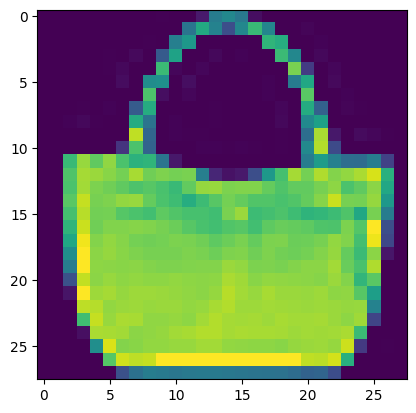

Label: Bag


In [ ]:
# Display one of the images
i = 100
img = train_images[i, :, :]
plt.imshow(img)
plt.show()
print("Label:", labels[train_labels[i]])


Let us first specify the model and compile options again. Note the change in some parameters to align with training data. That is, flatten the input image (to feed into the next dense layer). Change the number of neurons in the output layer to match the number of labels of our data. Since labels are integers (and not one-hot-encoded), use the sparse categorical crossentropy as the loss measure.

In [ ]:
model = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
]
)

model.compile(
    optimizer = 'rmsprop', #other options: 'adam', 'rmsprop'
    #loss = 'binary_crossentropy', #when the output is binary (a single neuron)
    loss = 'sparse_categorical_crossentropy', #when the output is not binary (multiple neurons)

    metrics = ['accuracy'] #evaluates each epoch of the training along with the evaluation of the loss function
    #metrics = ['accuracy', 'mae'] #more metrics can be added such as mean-absolute-error
)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


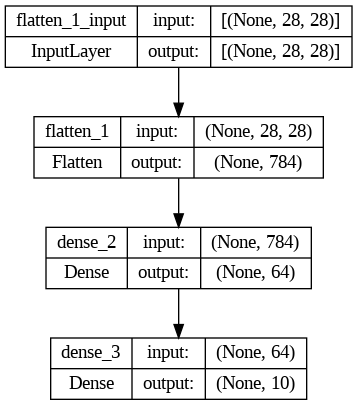

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
?model.fit

In [ ]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=200, verbose =2)

Epoch 1/5
300/300 - 1s - loss: 0.6632 - accuracy: 0.7789 - 1s/epoch - 5ms/step
Epoch 2/5
300/300 - 1s - loss: 0.4637 - accuracy: 0.8378 - 833ms/epoch - 3ms/step
Epoch 3/5
300/300 - 1s - loss: 0.4168 - accuracy: 0.8544 - 876ms/epoch - 3ms/step
Epoch 4/5
300/300 - 1s - loss: 0.3886 - accuracy: 0.8625 - 870ms/epoch - 3ms/step
Epoch 5/5
300/300 - 1s - loss: 0.3662 - accuracy: 0.8700 - 910ms/epoch - 3ms/step


## The Predict Method

We're now going to see how well our network has learned by evaluating it's performance on a held out test set. This is data that wasn't used in the training so it will give us a good measure of how well the network has learned to generalize beyond the training data.

We will use the `model.evaluate(X_test, Y_test)` function, where `X_test` are the test inputs and `Y_test` are the test labels. Again, each of these arrays contains a number of data examples. The first dimension of each array corresponds to the number of examples in the test set. Running `model.evaluate`, will iterate over the test set and calculate the loss and the metrics (that we have previously defined) on that test set. Hopefully, if our model has trained well, then these loss of metric values won't be too far off what we achieved on the training set. So we should use the `evaluate` method whenever we have a held-out test set like this to evaluate the performance of the network.

In [ ]:
# Print the shape of the test data and test labels
print(test_images.shape)
print(test_labels.shape)

(10000, 28, 28)
(10000,)


In [ ]:
?model.evaluate

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels) #what is the default batch size? Check the docs!

313/313 [==============================] - 1s 2ms/step - loss: 0.3851 - accuracy: 0.8651



We can also obtain predictions on unseen input data using `model.predict` method.

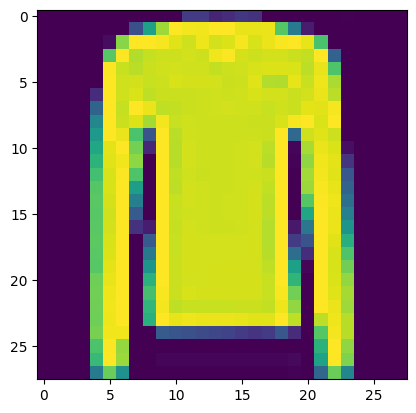

Label: Pullover


In [ ]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])
test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [ ]:
#CAUTION: THIS CELL WILL GIVE AN ERROR. WHY? LOOK AT THE NEXT CELL FOR SOLUTION.
print(test_image.shape)
pred = model.predict(test_image)

(28, 28)


ValueError: ignored

The `predict` method expects a batch of images of shape (B, rows, columns). If there is only one image, B = 1. So we need to insert a new axis to provide that additional channel. Of course, this is only required when predicting a single image.

In [ ]:
print(test_image[np.newaxis].shape)
pred = model.predict(test_image[np.newaxis,:])
print(pred.shape)
print(pred)

(1, 28, 28)
1/1 [==============================] - 0s 56ms/step
(1, 10)
[[5.3571832e-05 1.6935179e-05 9.9479586e-01 8.1070875e-06 1.8739798e-03
  5.0028665e-11 3.2462021e-03 3.3468967e-11 5.2877231e-06 6.4403387e-13]]


In [ ]:
print("Prediction: ", labels[np.argmax(pred)])

Prediction:  Pullover
